In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

from matplotlib.lines import Line2D
from matplotlib import pyplot

In [5]:
os.path.exists

<function genericpath.exists(path)>

In [6]:
basic_wds = [5e-2,5e-1,1e-1,1.0,10.,100.]
equiv_wds = [1e-2,1e-3,1e-4,1e-5]
results = []
results = pd.DataFrame(columns=range(5))
for basic_idx, basic_wd in enumerate(basic_wds):
    for equiv_idx, equiv_wd in enumerate(equiv_wds):
        fname = "inertia_log_MixedEMLP_basic" + str(basic_wd) + "_equiv" + str(equiv_wd) + ".pkl"
        if os.path.exists("./saved-outputs/" + fname):
            df = pd.read_pickle("./saved-outputs/" + fname)
            if basic_wd == 0.:
                df['basic_wd'] = 1e-7
            else:
                df['basic_wd'] = basic_wd
            if equiv_wd == 0.:
                df['equiv_wd'] = 1e-7
            else:
                df['equiv_wd'] = equiv_wd
            
            results = pd.concat((results, df))

results.columns = ['trial', 'tr_loss', 'te_loss', 'basic_wd', 'equiv_wd']

In [7]:
results['log_basic'] = np.log10(results['basic_wd'])
results['log_equiv'] = np.log10(results['equiv_wd'])
# results = results.replace(to_replace=-7, value=r'-inf')

results["equiv_hue"] = ["$%s$" % x for x in results["log_equiv"]]
results["basic_hue"] = ["$%s$" % x for x in results["log_basic"]]

In [8]:
results[results['te_loss'] > 10.] = None

In [9]:
# results = results[(results['log_basic'] >= 0.) & (results['log_equiv'] <= -2.)]

ValueError: The palette list has the wrong number of colors.

<Figure size 900x600 with 0 Axes>

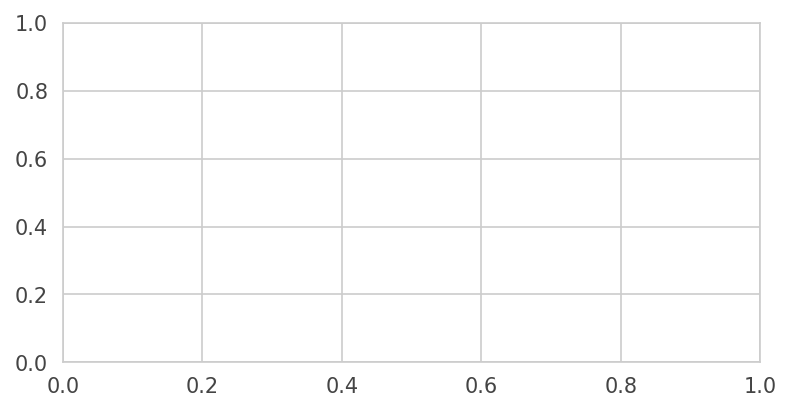

In [15]:

ncolor = len(results['log_basic'].unique())
# ncolor=4

lightcmap = cmocean.tools.crop_by_percent(cmo.matter, ncolor, which='min', N=None)
cpal = sns.color_palette("cmo.matter", n_colors=ncolor)#, desat=0.2)

fs = 16
sns.set_style("whitegrid")

COLOR = '#444444'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.figure(dpi=150)
# sns.lineplot(x='log_equiv', y='te_loss', hue='basic_hue', data=results[results['log_basic'] < -1.],
#             palette='RdYlBu')

fig, ax = plt.subplots(dpi=150, figsize=(6, 3))
g = sns.lineplot(x='equiv_wd', y='te_loss', data=results,
        hue='basic_hue', markers=['o' for _ in range(ncolor)],
             style='basic_hue', dashes=False, markersize=10,
                ax=ax, palette=cpal, legend=False)
print(g)
ax.legend(loc='lower left', title='Log Basic Precision', bbox_to_anchor=(1., 0.3),
         labels=[r"$10^{-1}$", r"$10^{0}$", r"$10^{1}$", r"$10^{2}$"])
ax.set_xlabel("Equivariant Precision", fontsize=fs)
ax.set_ylabel("Test MSE", fontsize=fs)
ax.set_title("Modified Inertia Test MSE", fontsize=16)
# plt.ylim(0, 10)
# ax.set_xlim(-7, -1)
# ax.set_xticklabels([r"-$\infty$", -6, -5, -4, -3, -2, -1])
ax.tick_params('both', labelsize=fs-2)
ax.axhline(4.791855, linewidth=2.)
ax.axhline(1.053696, linestyle='--', linewidth=2.)
sns.despine()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.)

ax.set_yticks([1., 5.])
ax.set_yticklabels([r"$1x10^{0}$", r"$5x10^{0}$"])
    
handles = []
labels = []
plt.semilogx()
plt.semilogy()
handles.append(Line2D([0], [0], color="#1f77b4", lw=2))
handles.append(Line2D([0], [0], color="#1f77b4", lw=2, ls="--"))
labels.append("MLP")
labels.append("EMLP")

legend1 = fig.legend(handles, labels, bbox_to_anchor=(1.12, 0.35))
pyplot.gca().add_artist(legend1)

ax.set_yticks([1., 5.])
ax.set_yticklabels([r"$10^{0}$", r"$5x10^{0}$"])


plt.savefig("./figs/inertia_equiv_wd.pdf", bbox_inches='tight')
plt.show()

In [ ]:
results.log_basic.unique()

array([], dtype=object)

In [ ]:
equiv_wd = 0.001
basic_wd = 100.0

fname = "./saved-outputs/inertia_log_mlp_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

mlp = pd.read_pickle(fname)

FileNotFoundError: [Errno 2] No such file or directory: './saved-outputs/inertia_log_mlp_basic100.0_equiv0.001.pkl'

In [ ]:
mlp

,0,1,2
0,0,0.010037,4.078928
1,1,0.045966,4.831995
2,2,0.019649,5.063202
3,3,0.010555,5.153609
4,4,0.007238,4.730743
5,5,0.005874,4.775525
6,6,0.013438,4.674380
7,7,0.021992,5.091274
8,8,0.015446,4.423052
9,9,0.188041,5.095848


In [ ]:
mlp.mean()

0    4.500000
1    0.033824
2    4.791855
dtype: float64

In [ ]:
equiv_wd = 0.001
basic_wd = 100.0

fname = "./saved-outputs/inertia_log_emlp_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

emlp = pd.read_pickle(fname)

In [ ]:
emlp.mean()

0    4.500000
1    0.505403
2    1.185061
dtype: float64